Natalie Wellen<br>
March, 2020 <br>
# Playing With Dynamical Systems
This notebook is an exploration into what dynamical systems look like. If I change this varibale how does the vector field change? etc. <br>
<br>
The goal is to get a better idea of how this mathematics works. If I want to use it to model supply and demand, then I need to know how it works. Currently taught supply and demand only has one fixed point, so I want to understand what it takes to get three fixed points, two stable and one unstable inbetween. Then I want to explore if this is meaningful in the economic setting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# the x axis is the quantity values
# the y axis is the price values
xvals, yvals = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1)) 

First let's look at the dynamical system that I found in a textbook *Economic Dynamics: Phase Diagrams and Their Economic Application* by Ronald Shone:

In [3]:
# change in quantity over time for demand side
def q_D(a, b, y):
    return a-b*y
# change in quantity over time for supply side
def q_S(c, f, y):
    return c+f*y
# change in price over time
def p_dt(alpha, a, b, c, f, y):
    return alpha*(b+f)*y - alpha*(a-c)

Let's plot an example of this system

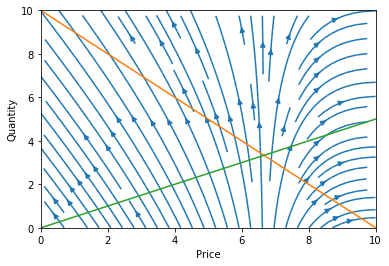

In [4]:
a = 10
b = 1
c = 0
f = 0.5
alpha = 0.5
ydot = q_D(a, b, xvals)
xdot = p_dt(alpha, a, b, c, f, xvals)
# plot dynamics of price and quantity movements
plt.streamplot(xvals, yvals, xdot, ydot)
plt.plot([10,0],[0,10])
plt.plot([0,10],[0,5])
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

We see in the plot above and below the equilibrium point of (6 2/3, 3 1/3). Above we have quantity as the y-axis and price as the x-axis. The orange line is the demand line that we are assuming in the plot. Consumer views on the product do not change over time, and so this is held constant. This can be thought of as the maximum quantity sold at any given price, and so only the values in the bottom left half should be analyzed as the top right is theoretically impossible.
In the plot below price is on the y-axis and quantity is the x-axis. It is almost the 90-degree rotation of the plot above. In neither of these plots is it clear what equilibrium is without the original linear system also plotted.  <br>
<br>
For me it is hard to see how this is a useful representation. This does not indicate at all how things evolve if the demand or supply shift. That would indicate that the parameters need to be analyzed more carefully since $b$ and $f$ indicate shifts in demand and supply respectively. However, perhaps more importantly, we see that the price is a source, an unstable fixed point in this system. If it starts at exactly 6 2/3 then it will remain at this value. Otherwise it will continue increasing to infinity or decreasing to zero if not stopped by the theoretical demand curve. 

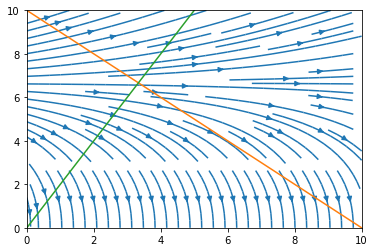

In [5]:
xdot = q_S(c, f, yvals)
ydot = p_dt(alpha, a, b, c, f, yvals)
plt.streamplot(xvals, yvals, xdot, ydot)
plt.plot([10,0], [0,10])
plt.plot([0,5],[0,10])
plt.show()

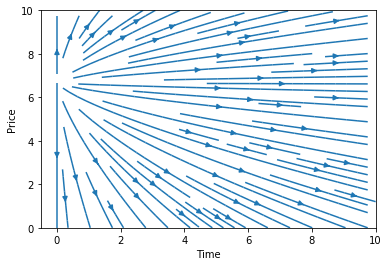

In [6]:
# try plotting price versus time
xdot = xvals
ydot = p_dt(alpha, a, b, c, f, yvals)
plt.streamplot(xvals, yvals, xdot, ydot)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

## Change $\alpha$ to negative

The following lots are the same as above, except that now we have a stable equilibrium since $\alpha < 0$.

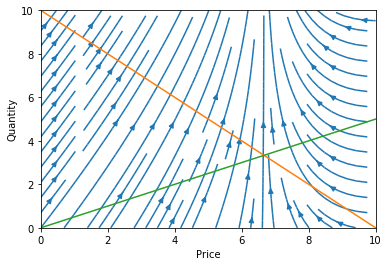

In [7]:
a = 10
b = 1
c = 0
f = 0.5
alpha = -0.5
ydot = q_D(a, b, xvals)
xdot = p_dt(alpha, a, b, c, f, xvals)
# plot dynamics of price and quantity movements
plt.streamplot(xvals, yvals, xdot, ydot)
plt.plot([10,0],[0,10])
plt.plot([0,10],[0,5])
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

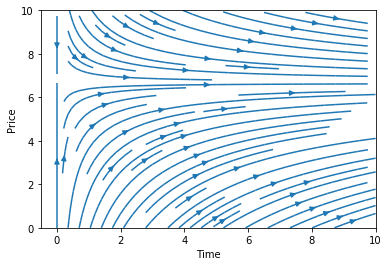

In [8]:
# try plotting price versus time
xdot = xvals
ydot = p_dt(alpha, a, b, c, f, yvals)
plt.streamplot(xvals, yvals, xdot, ydot)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()